## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [10]:
def build_mlp(dropout_ratio,nurons = [512,256,128,128]):
    input_layer = keras.layers.Input([x_train.shape[-1]])
    
    for index,nuron in enumerate(nurons):
        if index ==0:
            x = keras.layers.Dense(units = nuron,activation = 'relu')(input_layer)
        else:
            x = keras.layers.Dense(units = nuron,activation = 'relu')(x)
        x = keras.layers.Dropout(dropout_ratio)(x)
    output_layer = keras.layers.Dense(units = 10,activation = 'softmax')(x)
    model = keras.models.Model(inputs = [input_layer],outputs = [output_layer])
    return model

In [7]:
"""Code Here
設定超參數
"""
learning_rate = 1e-3
batch_size = 256
epoch = 50
dropout_ratio_list = [.2,.3,.4,.8]

In [23]:
def train_model(nurons,dropout_ratio_list = dropout_ratio_list):
    results = {}
    for dropout_ratio in dropout_ratio_list:
        model = build_mlp(dropout_ratio,nurons)
        optimizer = keras.optimizers.Adam(lr = learning_rate)
        model.compile(loss = 'categorical_crossentropy',metrics = ['accuracy'],optimizer = optimizer)
        model.fit(x_train,y_train,
                 epochs = epoch,
                 batch_size = batch_size,
                 validation_data = (x_test,y_test),
                 shuffle = True)

        history = model.history.history
        index_name = 'layers=%s,dropout=%s'%(len(nurons),dropout_ratio)
        results[index_name] = {'val_loss':history['val_loss'],
                              'loss':history['loss'],
                              'val_accuracy':history['val_accuracy'],
                              'accuracy':history['accuracy']}
    
    return results

In [24]:
result_layer4 = train_model(nurons = [512,256,128,128])
result_layer5 = train_model(nurons = [512,256,128,128,128])

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 111us/step - loss: 2.0722 - accuracy: 0.2256 - val_loss: 1.8324 - val_accuracy: 0.3380
Epoch 2/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.8892 - accuracy: 0.3126 - val_loss: 1.7541 - val_accuracy: 0.3722
Epoch 3/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.8165 - accuracy: 0.3409 - val_loss: 1.7185 - val_accuracy: 0.4014
Epoch 4/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.7780 - accuracy: 0.3589 - val_loss: 1.6851 - val_accuracy: 0.3972
Epoch 5/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.7434 - accuracy: 0.3701 - val_loss: 1.6351 - val_accuracy: 0.4078
Epoch 6/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.7112 - accuracy: 0.3832 - val_loss: 1.6038 - val_accuracy: 0.4311
Epoch 7/50
50000/50000 [==============================] - 5s 1

50000/50000 [==============================] - 5s 99us/step - loss: 1.8586 - accuracy: 0.3189 - val_loss: 1.7865 - val_accuracy: 0.3694
Epoch 6/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.8381 - accuracy: 0.3289 - val_loss: 1.7742 - val_accuracy: 0.3653
Epoch 7/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.8195 - accuracy: 0.3371 - val_loss: 1.7336 - val_accuracy: 0.3791
Epoch 8/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.8057 - accuracy: 0.3431 - val_loss: 1.7134 - val_accuracy: 0.4044
Epoch 9/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.7904 - accuracy: 0.3496 - val_loss: 1.7169 - val_accuracy: 0.4008
Epoch 10/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.7787 - accuracy: 0.3547 - val_loss: 1.7405 - val_accuracy: 0.3886
Epoch 11/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.7805 - accuracy: 0.3538 - val_loss: 1.7156 -

50000/50000 [==============================] - 5s 98us/step - loss: 1.9102 - accuracy: 0.2844 - val_loss: 1.8790 - val_accuracy: 0.3300
Epoch 11/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.9051 - accuracy: 0.2915 - val_loss: 1.8730 - val_accuracy: 0.3242
Epoch 12/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.8989 - accuracy: 0.2916 - val_loss: 1.8698 - val_accuracy: 0.3255
Epoch 13/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.8943 - accuracy: 0.2978 - val_loss: 1.8522 - val_accuracy: 0.3219
Epoch 14/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.8851 - accuracy: 0.3028 - val_loss: 1.8548 - val_accuracy: 0.3417
Epoch 15/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.8767 - accuracy: 0.3058 - val_loss: 1.8464 - val_accuracy: 0.3457
Epoch 16/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.8734 - accuracy: 0.3066 - val_loss: 1.8394

50000/50000 [==============================] - 5s 97us/step - loss: 2.3027 - accuracy: 0.0969 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 16/50
50000/50000 [==============================] - 5s 97us/step - loss: 2.3033 - accuracy: 0.1007 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 17/50
50000/50000 [==============================] - 5s 97us/step - loss: 2.3030 - accuracy: 0.0994 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 18/50
50000/50000 [==============================] - 5s 97us/step - loss: 2.3029 - accuracy: 0.0994 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 19/50
50000/50000 [==============================] - 5s 110us/step - loss: 2.3027 - accuracy: 0.0976 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 20/50
50000/50000 [==============================] - 5s 109us/step - loss: 2.3027 - accuracy: 0.0978 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 21/50
50000/50000 [==============================] - 5s 100us/step - loss: 2.3027 - accuracy: 0.0981 - val_loss: 2.3

Epoch 20/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.6138 - accuracy: 0.4177 - val_loss: 1.5364 - val_accuracy: 0.4545
Epoch 21/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.6082 - accuracy: 0.4213 - val_loss: 1.5355 - val_accuracy: 0.4482
Epoch 22/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.6028 - accuracy: 0.4242 - val_loss: 1.5351 - val_accuracy: 0.4519
Epoch 23/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.5961 - accuracy: 0.4276 - val_loss: 1.5271 - val_accuracy: 0.4560
Epoch 24/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.5921 - accuracy: 0.4295 - val_loss: 1.5287 - val_accuracy: 0.4641
Epoch 25/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.5785 - accuracy: 0.4349 - val_loss: 1.5157 - val_accuracy: 0.4659
Epoch 26/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.5819 - accuracy: 0.4316

Epoch 25/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.7872 - accuracy: 0.3435 - val_loss: 1.7649 - val_accuracy: 0.3582
Epoch 26/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.7840 - accuracy: 0.3472 - val_loss: 1.7437 - val_accuracy: 0.3715
Epoch 27/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.7813 - accuracy: 0.3474 - val_loss: 1.7149 - val_accuracy: 0.3950
Epoch 28/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.7727 - accuracy: 0.3513 - val_loss: 1.7176 - val_accuracy: 0.3931
Epoch 29/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.7695 - accuracy: 0.3514 - val_loss: 1.7387 - val_accuracy: 0.3835
Epoch 30/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.7666 - accuracy: 0.3529 - val_loss: 1.7096 - val_accuracy: 0.3922
Epoch 31/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.7660 - accuracy: 0.3553 

Epoch 30/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.9539 - accuracy: 0.2438 - val_loss: 1.9827 - val_accuracy: 0.2373
Epoch 31/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.9493 - accuracy: 0.2455 - val_loss: 1.9426 - val_accuracy: 0.2491
Epoch 32/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.9513 - accuracy: 0.2434 - val_loss: 1.9631 - val_accuracy: 0.2505
Epoch 33/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.9494 - accuracy: 0.2442 - val_loss: 2.0062 - val_accuracy: 0.2324
Epoch 34/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.9462 - accuracy: 0.2451 - val_loss: 1.9751 - val_accuracy: 0.2513
Epoch 35/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.9453 - accuracy: 0.2490 - val_loss: 1.9685 - val_accuracy: 0.2474
Epoch 36/50
50000/50000 [==============================] - 5s 110us/step - loss: 1.9448 - accuracy: 0.2499

Epoch 35/50
50000/50000 [==============================] - 5s 104us/step - loss: 2.3027 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 36/50
50000/50000 [==============================] - 5s 105us/step - loss: 2.3027 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 37/50
50000/50000 [==============================] - 5s 104us/step - loss: 2.3027 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 38/50
50000/50000 [==============================] - 5s 104us/step - loss: 2.3027 - accuracy: 0.0994 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 39/50
50000/50000 [==============================] - 5s 104us/step - loss: 2.3027 - accuracy: 0.0974 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 40/50
50000/50000 [==============================] - 5s 107us/step - loss: 2.3026 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 41/50
50000/50000 [==============================] - 5s 104us/step - loss: 2.3027 - accuracy: 0.0986

In [48]:

result_layer8 = train_model(nurons = [512,256,128,128,128,128,128,128])

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 132us/step - loss: 2.1911 - accuracy: 0.1498 - val_loss: 2.0770 - val_accuracy: 0.1853
Epoch 2/50
50000/50000 [==============================] - 7s 145us/step - loss: 2.0339 - accuracy: 0.2125 - val_loss: 1.9184 - val_accuracy: 0.2746
Epoch 3/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.9435 - accuracy: 0.2579 - val_loss: 1.8859 - val_accuracy: 0.2902
Epoch 4/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.9079 - accuracy: 0.2815 - val_loss: 1.8263 - val_accuracy: 0.3079
Epoch 5/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.8816 - accuracy: 0.2936 - val_loss: 1.8347 - val_accuracy: 0.3111
Epoch 6/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.8581 - accuracy: 0.3030 - val_loss: 1.7942 - val_accuracy: 0.3364
Epoch 7/50
50000/50000 [==============================] - 6s 1

50000/50000 [==============================] - 5s 108us/step - loss: 2.0430 - accuracy: 0.2011 - val_loss: 2.0716 - val_accuracy: 0.2160
Epoch 6/50
50000/50000 [==============================] - 5s 109us/step - loss: 2.0261 - accuracy: 0.2111 - val_loss: 2.1297 - val_accuracy: 0.2000
Epoch 7/50
50000/50000 [==============================] - 5s 108us/step - loss: 2.0077 - accuracy: 0.2210 - val_loss: 1.9974 - val_accuracy: 0.2365
Epoch 8/50
50000/50000 [==============================] - 5s 110us/step - loss: 1.9946 - accuracy: 0.2270 - val_loss: 2.0640 - val_accuracy: 0.2202
Epoch 9/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.9846 - accuracy: 0.2313 - val_loss: 2.0048 - val_accuracy: 0.2281
Epoch 10/50
50000/50000 [==============================] - 5s 110us/step - loss: 1.9860 - accuracy: 0.2302 - val_loss: 2.0023 - val_accuracy: 0.2378
Epoch 11/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.9686 - accuracy: 0.2405 - val_loss: 1.9

50000/50000 [==============================] - 5s 108us/step - loss: 2.0604 - accuracy: 0.1877 - val_loss: 2.2384 - val_accuracy: 0.1250
Epoch 10/50
50000/50000 [==============================] - 6s 110us/step - loss: 2.0610 - accuracy: 0.1882 - val_loss: 2.2345 - val_accuracy: 0.1303
Epoch 11/50
50000/50000 [==============================] - 5s 109us/step - loss: 2.0579 - accuracy: 0.1905 - val_loss: 2.2044 - val_accuracy: 0.1354
Epoch 12/50
50000/50000 [==============================] - 6s 115us/step - loss: 2.0548 - accuracy: 0.1887 - val_loss: 2.2235 - val_accuracy: 0.1332
Epoch 13/50
50000/50000 [==============================] - 5s 106us/step - loss: 2.0544 - accuracy: 0.1895 - val_loss: 2.1386 - val_accuracy: 0.1609
Epoch 14/50
50000/50000 [==============================] - 5s 109us/step - loss: 2.0463 - accuracy: 0.1937 - val_loss: 2.2162 - val_accuracy: 0.1442
Epoch 15/50
50000/50000 [==============================] - 6s 115us/step - loss: 2.0474 - accuracy: 0.1993 - val_loss:

Epoch 14/50
50000/50000 [==============================] - 6s 113us/step - loss: 2.3031 - accuracy: 0.0976 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 15/50
50000/50000 [==============================] - 6s 118us/step - loss: 2.3030 - accuracy: 0.0974 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 16/50
50000/50000 [==============================] - 7s 131us/step - loss: 2.3030 - accuracy: 0.0983 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 17/50
50000/50000 [==============================] - 6s 124us/step - loss: 2.3027 - accuracy: 0.0998 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 18/50
50000/50000 [==============================] - 6s 122us/step - loss: 2.3029 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 19/50
50000/50000 [==============================] - 6s 119us/step - loss: 2.3029 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 20/50
50000/50000 [==============================] - 6s 116us/step - loss: 2.3027 - accuracy: 0.0982

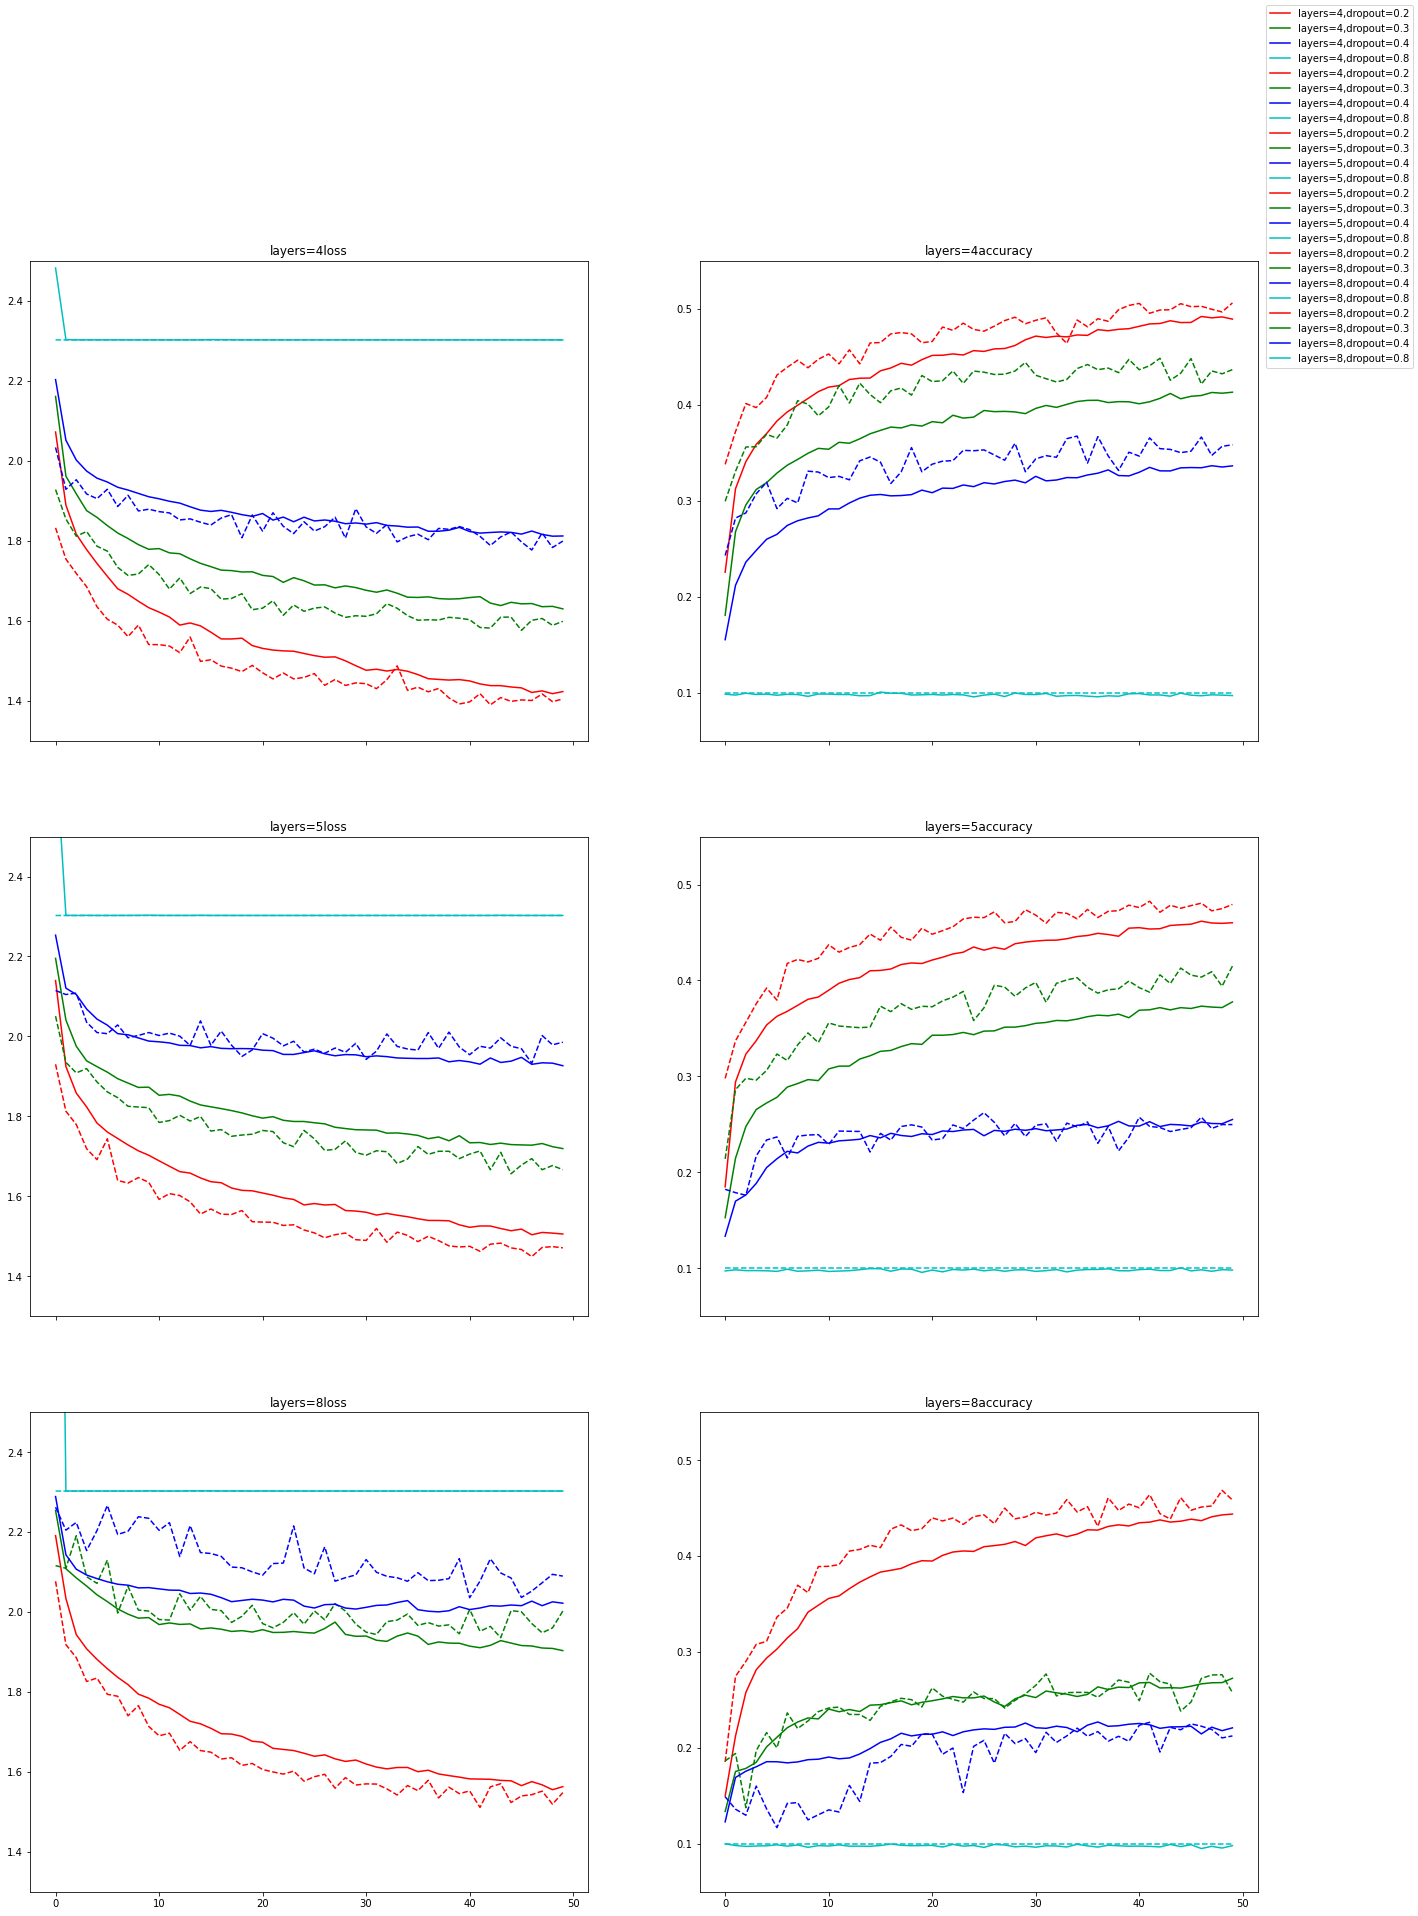

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
fig,axes = plt.subplots(3,2,sharex = True)
fig.set_size_inches(22,30)
results = [result_layer4,result_layer5,result_layer8]
color = ['r','g','b','c','m']

for index,result in enumerate(results):
    for dropout_ratio_index,name in enumerate(result):
        axes[index][0].plot(range(epoch),result[name]['val_loss'],'--',color = color[dropout_ratio_index])
        axes[index][0].plot(range(epoch),result[name]['loss'],'-',label = name,color = color[dropout_ratio_index])
        axes[index][1].plot(range(epoch),result[name]['val_accuracy'],'--',color = color[dropout_ratio_index])
        axes[index][1].plot(range(epoch),result[name]['accuracy'],'-',label = name,color = color[dropout_ratio_index])
    axes[index][0].set_title(name[:8] + 'loss')
    axes[index][1].set_title(name[:8] + 'accuracy')
    axes[index][0].set_ylim([1.3,2.5])
    axes[index][1].set_ylim([0.05,0.55])
fig.legend(loc = 'upper right',prop = {'size':10})
plt.show()

In [32]:
for index,name in enumerate(result_layer5):
    print(name)

layers=5,dropout=0.2
layers=5,dropout=0.3
layers=5,dropout=0.4
layers=5,dropout=0.8
